In [1]:
import sys
import numpy as np
import pandas as pd
import pygeohydro as gh
from pygeohydro import NWIS
import matplotlib.pyplot as plt

sys.path.append('../')

import sglib as sg
from sglib.verification.drought import get_drought_metrics, calculate_ssi_values
from sglib.plotting.drought import drought_metric_scatter_plot
from sglib.methods.parametric.ThomasFiering import ThomasFieringGenerator

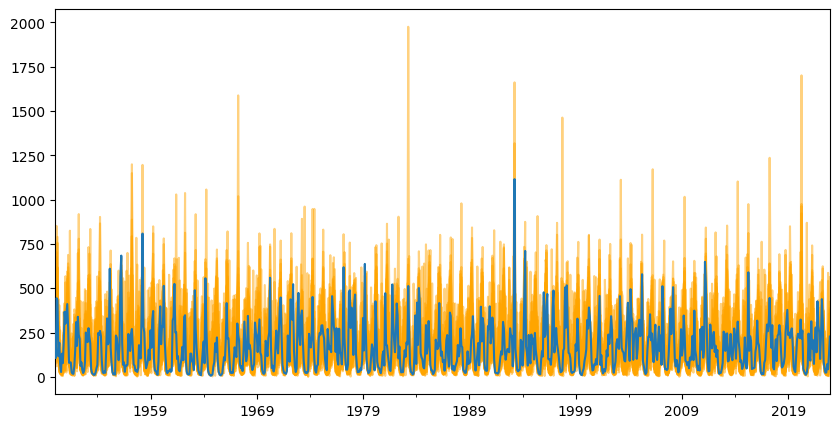

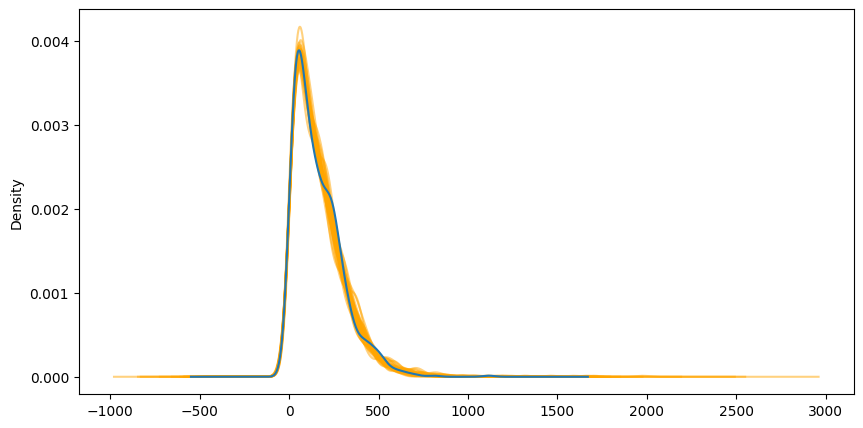

In [5]:
### Load demo data
Q_obs = pd.read_csv('./example_data/usgs_daily_streamflow_cms.csv', index_col=0, parse_dates=True)
Q_obs_monthly = Q_obs.resample('MS').sum()

# ThomasFiering Model
tf = ThomasFieringGenerator(Q_obs_monthly.iloc[:,2])
Q_syn = tf.generate(n_years=73, n_realizations=30)

tf.plot(kind='ts')
tf.plot(kind='kde')

drought_metric_scatter_plot(get_drought_metrics(Q_obs_monthly, window=24), 
                            get_drought_metrics(Q_syn, window=24))

In [201]:





def deseasonalize(df, freq='MS'):
    """
    Deseasonalize a time series by subtracting the mean of each month.
    """
    month_means = df.groupby(df.index.month).mean()
    
    return df.groupby(df.index.month).transform(lambda x: x - month_means[x.index.month].values)


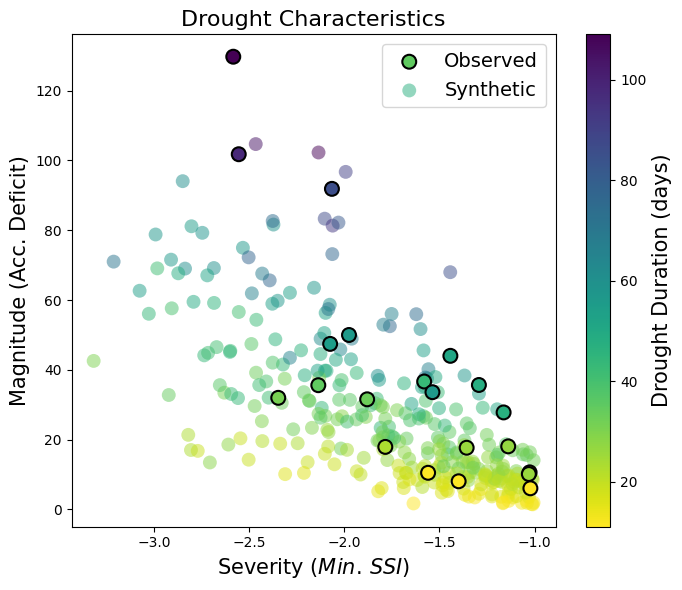

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
